Analiza korelacji. (Pozmieniałem nazwy kolumn w danych m.in. usunąłem polskie znaki)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from datetime import date, timedelta, datetime

In [ ]:
meteo = pd.read_csv(r"C:\Users\User\matuzytkowa\meteo.csv")
meteo = meteo.replace(np.nan, 0)
 


# dodanie pełnej daty do meteo
buff = meteo[["Rok","Miesiac","Dzien"]]
buff.columns = ["year", "month", "day"]

meteo['data'] = pd.to_datetime(buff)
meteo['data']=meteo['data'].astype(str)


gios = pd.read_csv(r"C:\Users\User\matuzytkowa\GIOS.csv")

# dodanie roku do giosa
gios['Rok'] = pd.DatetimeIndex(gios['data']).year
gios['Miesiac'] = pd.DatetimeIndex(gios['data']).month

gios = gios.replace(np.nan, 0)
gios['data']=gios['data'].astype(str) 


dni_robocze = pd.read_csv(r"C:\Users\User\matuzytkowa\dni robocze.csv")
dni_robocze['Rok'] = pd.DatetimeIndex(dni_robocze['data']).year
dni_robocze['Miesiac'] = pd.DatetimeIndex(dni_robocze['data']).month

dni_robocze['data'] = pd.to_datetime(dni_robocze['data'])
dni_robocze = dni_robocze.replace(np.nan, 0)
dni_robocze['data'] = dni_robocze['data'].astype(str) 

In [ ]:
meteo

,Unnamed: 0,Kod_stacji,Nazwa_stacji,Rok,Miesiac,Dzien,Srednia_dobowa_wilgotnosc_wzgledna_proc,Srednia_dobowa_predkosc_wiatru_m_s,Maksymalna_temperatura_dobowa_c,Suma_dobowa_opadów__mm,Temperatura_powietrza_C,Wilgotnosc_wzgledna_proc,Predkosc_wiatru_m_s,Zachmurzenie_ogolne,Widzialnosc,lat,lon,data
0,0,249180010,PSZCZYNA,2010,1,1,0.0,1.0,3.0,2.8,1.266667,0.0,1.0,8.000000,6.000000,50.00,18.916667,2010-01-01
1,1,249180010,PSZCZYNA,2010,1,1,0.0,1.0,0.8,0.0,1.266667,0.0,1.0,8.000000,6.000000,50.00,18.916667,2010-01-01
2,2,249180010,PSZCZYNA,2010,1,2,0.0,1.0,0.8,2.4,-3.333333,0.0,1.0,8.000000,6.000000,50.00,18.916667,2010-01-02
3,3,249180010,PSZCZYNA,2010,1,2,0.0,1.0,-2.6,0.0,-3.333333,0.0,1.0,8.000000,6.000000,50.00,18.916667,2010-01-02
4,4,249180010,PSZCZYNA,2010,1,3,0.0,0.0,-3.5,2.3,-5.400000,0.0,0.0,8.000000,6.000000,50.00,18.916667,2010-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880768,880768,254220090,OLECKO,2020,9,28,0.0,0.0,16.0,0.1,11.833333,0.0,0.0,6.666667,8.000000,54.05,22.483333,2020-09-28
880769,880769,254220090,OLECKO,2020,9,29,0.0,0.0,12.5,0.0,13.333333,0.0,0.0,7.333333,8.000000,54.05,22.483333,2020-09-29
880770,880770,254220090,OLECKO,2020,9,29,0.0,0.0,17.8,0.0,13.333333,0.0,0.0,7.333333,8.000000,54.05,22.483333,2020-09-29
880771,880771,254220090,OLECKO,2020,9,30,0.0,0.0,13.2,0.0,13.933333,0.0,0.0,7.666667,7.666667,54.05,22.483333,2020-09-30


In [ ]:
meteo_dni_sred_wilg = meteo['Srednia_dobowa_wilgotnosc_wzgledna_proc'].groupby(meteo['data']).mean().to_frame(name = 'avg_sred_wilg').reset_index()
meteo_dni_sred_wiatru = meteo['Srednia_dobowa_predkosc_wiatru_m_s'].groupby(meteo['data']).mean().to_frame(name = 'avg_sred_wiatru').reset_index()
meteo_dni_max_temp = meteo['Maksymalna_temperatura_dobowa_c'].groupby(meteo['data']).mean().to_frame(name = 'avg_max_temp').reset_index()
meteo_dni_opady = meteo['Suma_dobowa_opadów__mm'].groupby(meteo['data']).mean().to_frame(name = 'avg_opady').reset_index()
meteo_dni_wilgotnosc = meteo['Wilgotnosc_wzgledna_proc'].groupby(meteo['data']).mean().to_frame(name = 'avg_wilgotnosc').reset_index()
meteo_dni_wiatru = meteo['Predkosc_wiatru_m_s'].groupby(meteo['data']).mean().to_frame(name = 'avg_pred_wiatru').reset_index()
meteo_dni_zachmurzenie = meteo['Zachmurzenie_ogolne'].groupby(meteo['data']).mean().to_frame(name = 'avg_zachmurzenie').reset_index()
meteo_dni_widzialnosc = meteo['Widzialnosc'].groupby(meteo['data']).mean().to_frame(name = 'avg_widzialnosc').reset_index()


meteo_dni_sred_wilg

,data,avg_sred_wilg
0,2010-01-01,32.729936
1,2010-01-02,32.339490
2,2010-01-03,31.136306
3,2010-01-04,30.170701
4,2010-01-05,30.580892
...,...,...
3921,2020-09-26,34.321667
3922,2020-09-27,34.660000
3923,2020-09-28,34.856667
3924,2020-09-29,36.460000


In [ ]:
gios

,data,Kod_Stacji,PM10,NOx,CO,PM2.5,Longitude,Latitude,Rok,Miesiac
0,2019-01-01,DsDusznikMOB,0.00,8.987775,0.000000,0.0,16.393319E,50.402645N,2019,1
1,2019-01-01,DsDzialoszyn,0.00,5.425444,0.000000,0.0,14.941319E,50.972167N,2019,1
2,2019-01-01,DsDziePilsud,0.00,14.609665,0.000000,0.0,16.648050E,50.732817N,2019,1
3,2019-01-01,DsGlogWiStwo,13.71,0.000000,0.000000,0.0,16.097822E,51.657022N,2019,1
4,2019-01-01,DsJaworMOB,13.15,5.766020,0.000000,0.0,16.202317E,51.049212N,2019,1
...,...,...,...,...,...,...,...,...,...,...
842164,2010-12-31,ZpSzczLacz04,14.30,18.500000,0.306667,0.0,14.556250E,53.470889N,2010,12
842165,2010-12-31,ZpSzczPils02,0.00,44.300000,0.556667,0.0,14.553900E,53.432169N,2010,12
842166,2010-12-31,ZpSzczec1Maj,34.30,0.000000,0.000000,22.4,16.692517E,53.712114N,2010,12
842167,2010-12-31,ZpSzczecinDO,0.00,51.304348,0.000000,0.0,14.532333E,53.428815N,2010,12


In [ ]:
# dni_robocze
dni_robocze

,data,dzien_tyg,czy_roboczy,swieta,ferie,Rok,Miesiac
0,2010-01-01,5,0,1.0,0.0,2010,1
1,2010-01-02,6,0,0.0,0.0,2010,1
2,2010-01-03,7,0,0.0,0.0,2010,1
3,2010-01-04,1,1,0.0,0.0,2010,1
4,2010-01-05,2,1,0.0,0.0,2010,1
...,...,...,...,...,...,...,...
4072,2021-02-24,3,1,0.0,0.0,2021,2
4073,2021-02-25,4,1,0.0,0.0,2021,2
4074,2021-02-26,5,1,0.0,0.0,2021,2
4075,2021-02-27,6,0,0.0,0.0,2021,2


Podsumowując posiadamy dane:
meteo <- pogoda
gios <- smog
dni_wolne <- dni wolne

In [ ]:
# gios_days = gios['PM10'].groupby(gios['Data']).mean()
# gios_days


In [ ]:
# gios_dni = gios.groupby(['Rok', 'Miesiac'])['PM10'].mean()

PM10_years = gios['PM10'].groupby(gios['Rok']).mean().to_frame(name = 'avg').reset_index()
NOx_years = gios['NOx'].groupby(gios['Rok']).mean().to_frame(name = 'avg').reset_index()
CO_years = gios['CO'].groupby(gios['Rok']).mean().to_frame(name = 'avg').reset_index()
PM2_5_years = gios['PM2.5'].groupby(gios['Rok']).mean().to_frame(name = 'avg').reset_index()


PM10_years
CO_years
PM2_5_years
NOx_years

,Rok,avg
0,2010,17.970791
1,2011,19.847508
2,2012,18.222016
3,2013,17.711747
4,2014,18.499866
5,2015,18.526562
6,2016,18.147051
7,2017,17.489859
8,2018,17.156700
9,2019,15.823397


In [ ]:
#podzial na miesiace
PM10_mies = gios.groupby(['Rok', 'Miesiac'])['PM10'].mean().to_frame(name = 'avg').reset_index()
NOx_mies = gios.groupby(['Rok', 'Miesiac'])['NOx'].mean().to_frame(name = 'avg').reset_index()
CO_mies = gios.groupby(['Rok', 'Miesiac'])['CO'].mean().to_frame(name = 'avg').reset_index()
PM2_5_mies = gios.groupby(['Rok', 'Miesiac'])['PM2.5'].mean().to_frame(name = 'avg').reset_index()



PM10_mies
CO_mies
PM2_5_mies
NOx_mies

,Rok,Miesiac,avg
0,2010,1,24.884678
1,2010,2,23.932839
2,2010,3,17.334019
3,2010,4,15.287282
4,2010,5,12.382470
...,...,...,...
115,2019,8,12.710240
116,2019,9,14.219017
117,2019,10,22.324211
118,2019,11,19.768605


In [ ]:
# PM10_dni.loc[PM10_dni['Rok'] == 2019]

([<matplotlib.axis.XTick at 0x1d6894b83c8>,
 <a list of 10 Text xticklabel objects>)

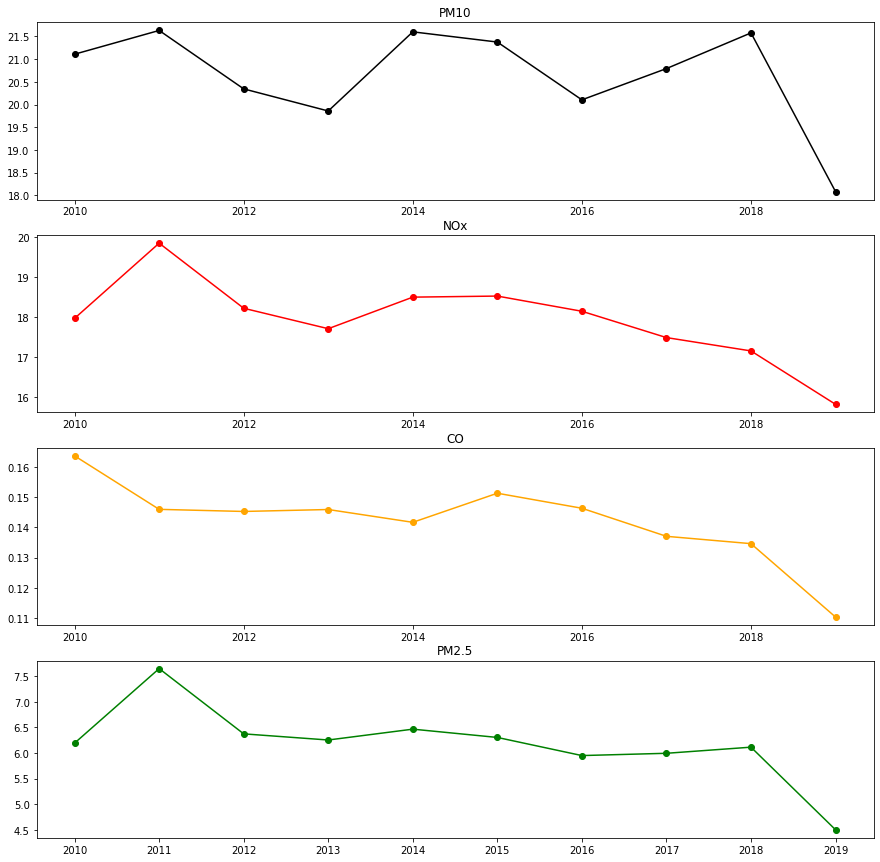

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(15,15))


ax1.plot(PM10_years['Rok'], PM10_years['avg'],'b-o',color ='black')
ax1.set_title('PM10')
plt.xticks(np.arange(2010, 2020, 1))
ax2.plot(NOx_years['Rok'], NOx_years['avg'], 'b-o',color ='red')
ax2.set_title('NOx')
plt.xticks(np.arange(2010, 2020, 1))
ax3.plot(CO_years['Rok'], CO_years['avg'], 'b-o',color ='orange')
ax3.set_title('CO')
plt.xticks(np.arange(2010, 2020, 1))
ax4.plot(PM2_5_years['Rok'], PM2_5_years['avg'], 'b-o',color ='green')
ax4.set_title('PM2.5')
plt.xticks(np.arange(2010, 2020, 1))

In [ ]:
y_choice = 2019
NOx_mies_2019 = NOx_mies.loc[NOx_mies['Rok'] == y_choice]
PM10_mies_2019 = PM10_mies.loc[PM10_mies['Rok'] == y_choice]
CO_mies_2019 = CO_mies.loc[CO_mies['Rok'] == y_choice]
PM2_5_mies_2019 = PM2_5_mies.loc[PM2_5_mies['Rok'] == y_choice]


([<matplotlib.axis.XTick at 0x1d6894eed88>,
 <a list of 12 Text xticklabel objects>)

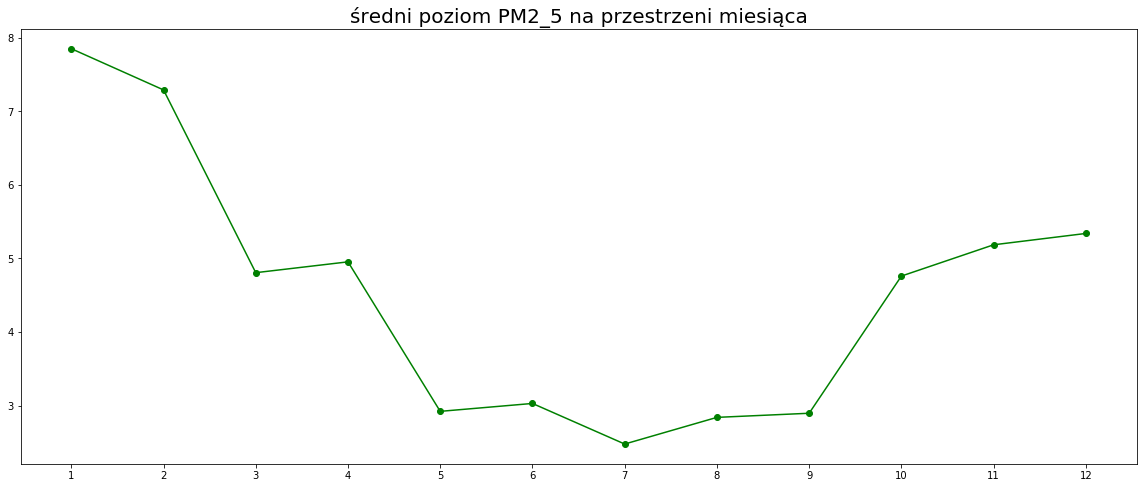

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(PM2_5_mies_2019['Miesiac'], PM2_5_mies_2019['avg'],'b-o',color ='green', label = 'PM10')
plt.title('średni poziom PM2_5 na przestrzeni miesiąca', fontsize=20)
plt.xticks(np.arange(1, 13, 1))

([<matplotlib.axis.XTick at 0x1d6894f3f88>,
 <a list of 12 Text xticklabel objects>)

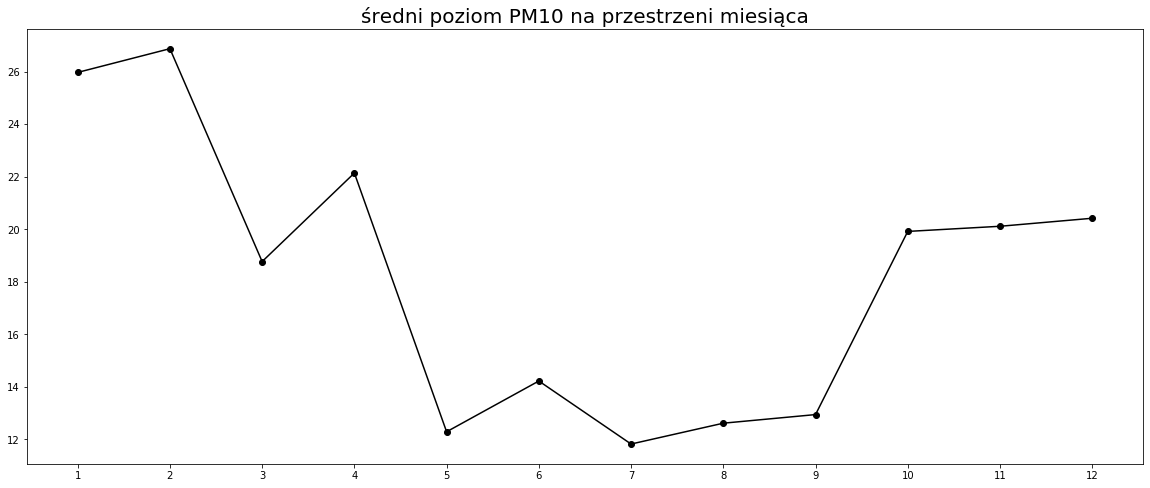

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(PM10_mies_2019['Miesiac'], PM10_mies_2019['avg'],'b-o',color ='black', label = 'PM10')
plt.title('średni poziom PM10 na przestrzeni miesiąca', fontsize=20)
plt.xticks(np.arange(1, 13, 1))

([<matplotlib.axis.XTick at 0x1d682b14948>,
 <a list of 12 Text xticklabel objects>)

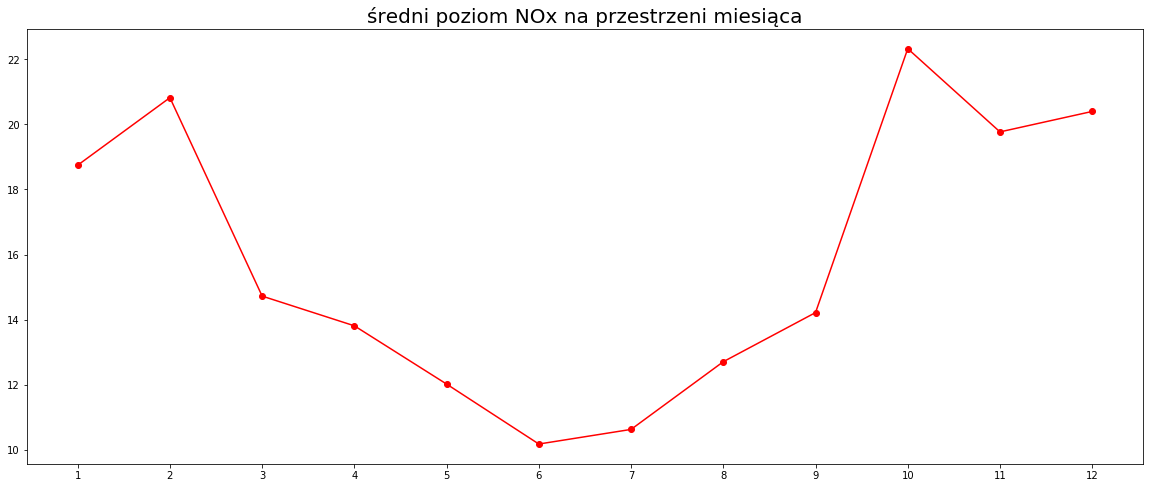

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(NOx_mies_2019['Miesiac'], NOx_mies_2019['avg'],'b-o',color ='red', label = 'NOx')
plt.title('średni poziom NOx na przestrzeni miesiąca', fontsize=20)
plt.xticks(np.arange(1, 13, 1))

([<matplotlib.axis.XTick at 0x1d689557148>,
 <a list of 12 Text xticklabel objects>)

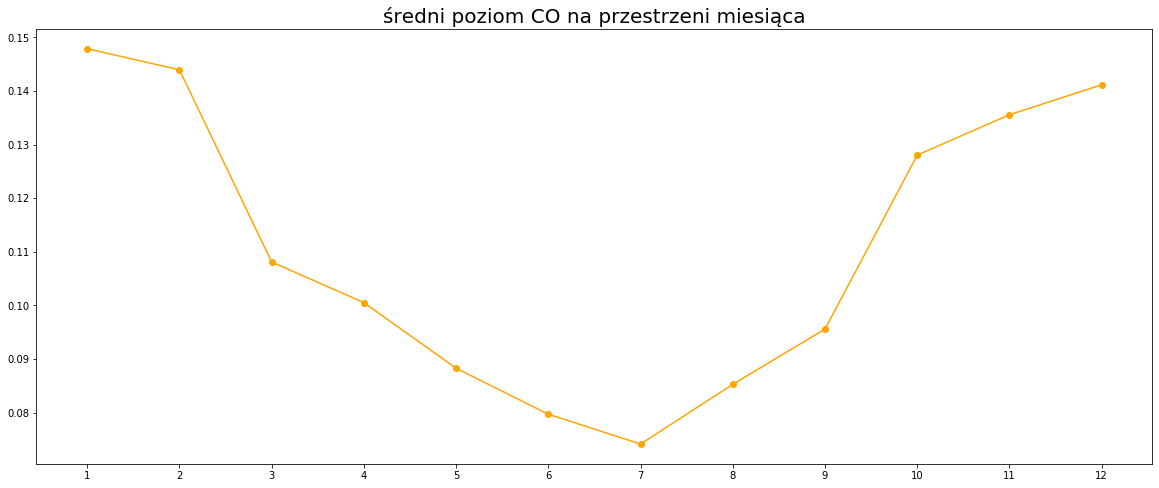

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(CO_mies_2019['Miesiac'], CO_mies_2019['avg'],'b-o',color ='orange', label = 'PM10')
plt.title('średni poziom CO na przestrzeni miesiąca', fontsize=20)
plt.xticks(np.arange(1, 13, 1))

In [ ]:
#podzial na dnie
PM10_dni = gios.groupby(['data'])['PM10'].mean().to_frame(name = 'avg_PM10').reset_index()
NOx_dni = gios.groupby(['data'])['NOx'].mean().to_frame(name = 'avg_NOx').reset_index()
CO_dni = gios.groupby(['data'])['CO'].mean().to_frame(name = 'avg_CO').reset_index()
PM2_5_dni = gios.groupby(['data'])['PM2.5'].mean().to_frame(name = 'avg_PM2.5').reset_index()



PM10_dni
NOx_dni
CO_dni
PM2_5_dni


,data,avg_PM2.5
0,2010-01-01,5.256655
1,2010-01-02,3.263996
2,2010-01-03,4.098678
3,2010-01-04,8.874525
4,2010-01-05,9.664538
...,...,...
3647,2019-12-27,2.375644
3648,2019-12-28,2.013984
3649,2019-12-29,3.346889
3650,2019-12-30,5.829050


tutaj możemy zmienić rok, żeby patrzec na poprzednie lata


In [ ]:
sdate = date(2018, 10, 1)   # start date
edate = date(2019, 3, 1)   # end date
delta = edate - sdate       # as timedelta

list_of_days =[]

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    day = str(day)
    list_of_days.append(day)


In [ ]:
PM10_dni_half = PM10_dni[PM10_dni.data.isin(list_of_days)]
NOx_dni_half = NOx_dni[NOx_dni.data.isin(list_of_days)]
CO_dni_half = PM10_dni[CO_dni.data.isin(list_of_days)]
PM2_5_dni_half = PM2_5_dni[PM2_5_dni.data.isin(list_of_days)]

dni_robocze_half = dni_robocze[dni_robocze.data.isin(list_of_days)]
# dni_robocze_half = dni_robocze_half.loc[dni_robocze_half['czy_roboczy'] == 1]

PM10_dni_half
NOx_dni_half
CO_dni_half
PM2_5_dni_half
# dni_robocze_half

,data,avg_PM2.5
3195,2018-10-01,5.518630
3196,2018-10-02,3.292097
3197,2018-10-03,1.821975
3198,2018-10-04,3.295179
3199,2018-10-05,5.042784
...,...,...
3342,2019-02-25,8.660137
3343,2019-02-26,6.274874
3344,2019-02-27,7.093632
3345,2019-02-28,8.223131


In [ ]:
super_data = pd.merge(left=dni_robocze, right=PM10_dni, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=NOx_dni, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=CO_dni, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=PM2_5_dni, left_on='data',right_on='data')

#meteo
super_data = pd.merge(left=super_data, right=meteo_dni_sred_wilg, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_sred_wiatru, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_max_temp, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_opady, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_wilgotnosc, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_wiatru, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_zachmurzenie, left_on='data',right_on='data')
super_data = pd.merge(left=super_data, right=meteo_dni_widzialnosc, left_on='data',right_on='data')

#zmiana kolejnosci
columns = ['czy_roboczy','swieta','ferie','Rok','Miesiac','dzien_tyg']
buff = super_data[columns]
super_data.drop(columns, inplace=True, axis=1)

super_data[columns] = buff
super_data

,data,avg_PM10,avg_NOx,avg_CO,avg_PM2.5,avg_sred_wilg,avg_sred_wiatru,avg_max_temp,avg_opady,avg_wilgotnosc,avg_pred_wiatru,avg_zachmurzenie,avg_widzialnosc,czy_roboczy,swieta,ferie,Rok,Miesiac,dzien_tyg
0,2010-01-01,22.796103,15.087031,0.259478,5.256655,32.729936,0.847134,-0.479936,0.599682,32.660297,0.847134,6.876858,4.475584,0,1.0,0.0,2010,1,5
1,2010-01-02,16.905945,11.194488,0.192366,3.263996,32.339490,0.996178,-1.983121,1.329936,32.227176,0.993631,6.919321,4.859873,0,0.0,0.0,2010,1,6
2,2010-01-03,19.881110,16.507427,0.248623,4.098678,31.136306,0.810191,-5.387261,0.515605,30.915074,0.808917,5.989384,5.091295,0,0.0,0.0,2010,1,7
3,2010-01-04,34.179291,30.762415,0.343528,8.874525,30.170701,0.835032,-7.214013,0.059873,29.989384,0.836518,4.794055,5.554140,1,0.0,0.0,2010,1,1
4,2010-01-05,38.262170,35.742975,0.374067,9.664538,30.580892,0.882803,-6.159873,0.074841,30.515924,0.883227,4.711253,5.505308,1,0.0,0.0,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,8.211599,10.022404,0.099534,2.375644,35.366154,2.030769,1.848462,1.944615,35.143590,2.025641,7.117949,5.835897,1,0.0,0.0,2019,12,5
3648,2019-12-28,6.788903,7.024040,0.092455,2.013984,33.180000,2.718462,0.117692,0.696154,32.974359,2.717949,7.410256,6.028205,0,0.0,0.0,2019,12,6
3649,2019-12-29,12.091678,8.862514,0.104651,3.346889,32.892308,1.403077,-1.586154,0.063846,32.682051,1.405128,6.784615,6.382051,0,0.0,0.0,2019,12,7
3650,2019-12-30,19.259876,16.127056,0.134168,5.829050,28.072308,1.946154,1.427692,0.045385,26.994872,1.943590,6.605128,6.582051,1,0.0,0.0,2019,12,1


In [ ]:
super_data_half = super_data[super_data.data.isin(list_of_days)]
super_data_wolne = super_data_half.loc[super_data['czy_roboczy'] == 0]
super_data_ferie = super_data_half.loc[super_data['ferie'] == 1]

super_data_ferie

,data,avg_PM10,avg_NOx,avg_CO,avg_PM2.5,avg_sred_wilg,avg_sred_wiatru,avg_max_temp,avg_opady,avg_wilgotnosc,avg_pred_wiatru,avg_zachmurzenie,avg_widzialnosc,czy_roboczy,swieta,ferie,Rok,Miesiac,dzien_tyg
3314,2019-01-28,34.255574,30.499390,0.196214,10.353274,31.801449,1.531884,1.342029,1.101449,32.927536,1.567633,6.601449,5.845411,1,0.0,1.0,2019,1,1
3315,2019-01-29,26.450980,25.453048,0.169390,8.662159,32.418841,1.400000,0.731884,0.089855,33.492754,1.396135,6.427536,6.140097,1,0.0,1.0,2019,1,2
3316,2019-01-30,36.960886,29.789409,0.200427,11.176479,32.036232,0.942029,0.084058,0.174638,33.188406,0.942029,5.792271,5.946860,1,0.0,1.0,2019,1,3
3317,2019-01-31,46.448626,34.688627,0.244489,14.685324,33.055072,0.927536,-0.233333,0.236957,34.033816,0.927536,5.516908,5.620773,1,0.0,1.0,2019,1,4
3318,2019-02-01,35.274676,24.995091,0.201284,10.833477,30.972059,2.466176,0.983824,0.346324,31.779412,2.465686,5.691176,6.264706,1,0.0,1.0,2019,2,5
3319,2019-02-02,20.919204,17.658203,0.163892,6.444659,29.679412,2.654412,6.276471,0.366176,30.568627,2.651961,6.803922,6.377451,0,0.0,1.0,2019,2,6
3320,2019-02-03,25.581864,17.547656,0.185745,7.694198,31.813235,1.485294,5.844853,2.673529,32.921569,1.480392,7.014706,5.941176,0,0.0,1.0,2019,2,7
3321,2019-02-04,15.148666,17.996231,0.142970,4.638902,31.572059,1.920588,1.983824,0.183088,32.857843,1.916667,7.240196,5.924020,1,0.0,1.0,2019,2,1
3322,2019-02-05,29.112612,24.160852,0.163563,8.638036,30.797059,1.192647,0.467647,0.079412,31.808824,1.196078,5.100490,6.411765,1,0.0,1.0,2019,2,2
3323,2019-02-06,33.718558,26.025350,0.159353,9.695313,30.180882,1.341176,0.905147,0.028676,31.004902,1.382353,5.186275,6.387255,1,0.0,1.0,2019,2,3


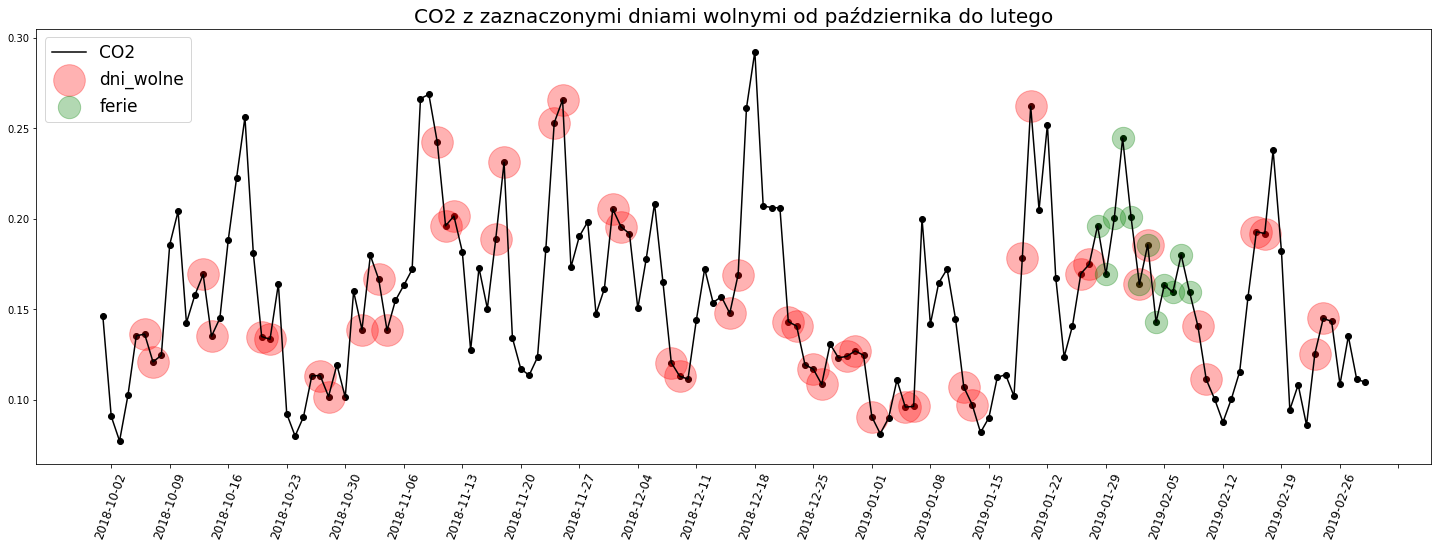

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(super_data_half['data'], super_data_half['avg_CO'] ,color ='black', label = 'CO2' )
plt.scatter(super_data_half['data'], super_data_half['avg_CO'] ,color ='black' )
plt.scatter(super_data_wolne['data'], super_data_wolne['avg_CO'] ,color ='red', alpha=0.3, s =1000 , label = 'dni_wolne' )
plt.scatter(super_data_ferie['data'], super_data_ferie['avg_CO'] ,color ='green', alpha=0.3, s =500 , label = 'ferie' )
plt.xticks(fontsize=12,rotation=70)
plt.xticks(np.arange(1, 160, 7))
plt.legend(loc=2, prop={'size': 17})
plt.title('CO2 z zaznaczonymi dniami wolnymi od października do lutego', fontsize=20)
plt.show()

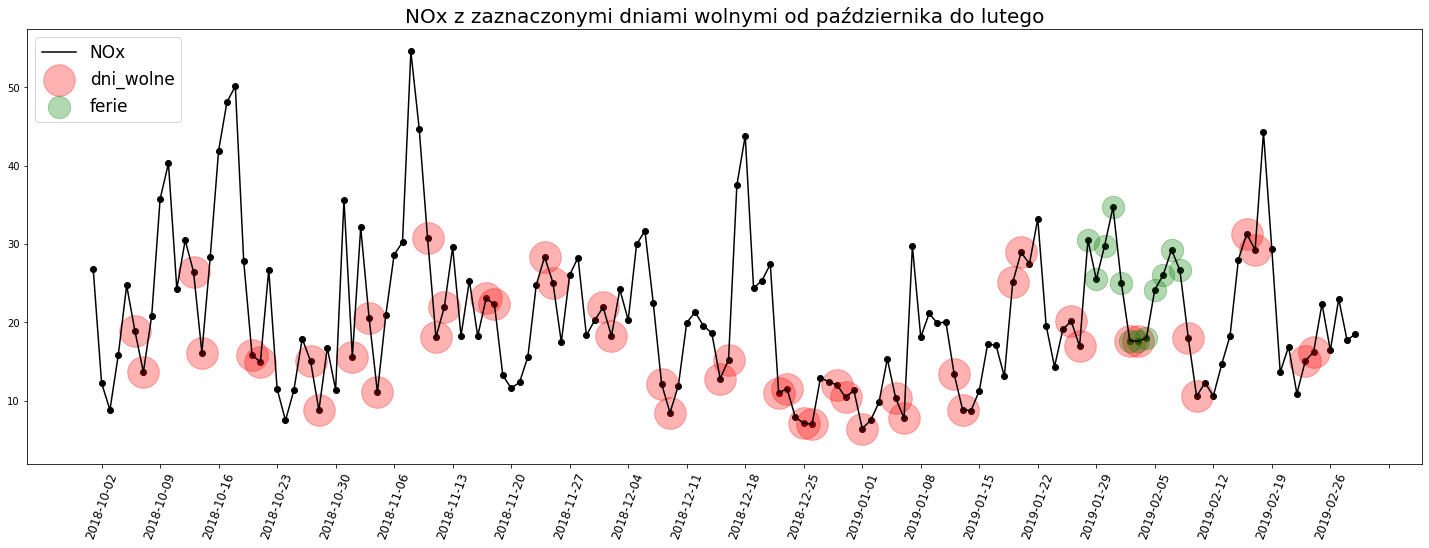

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(super_data_half['data'], super_data_half['avg_NOx'] ,color ='black', label = 'NOx' )
plt.scatter(super_data_half['data'], super_data_half['avg_NOx'] ,color ='black' )
plt.scatter(super_data_wolne['data'], super_data_wolne['avg_NOx'] ,color ='red', alpha=0.3, s =1000 , label = 'dni_wolne' )
plt.scatter(super_data_ferie['data'], super_data_ferie['avg_NOx'] ,color ='green', alpha=0.3, s =500 , label = 'ferie' )
plt.xticks(fontsize=12,rotation=70)
plt.xticks(np.arange(1, 160, 7))
plt.legend(loc=2, prop={'size': 17})
plt.title('NOx z zaznaczonymi dniami wolnymi od października do lutego', fontsize=20)
plt.show()

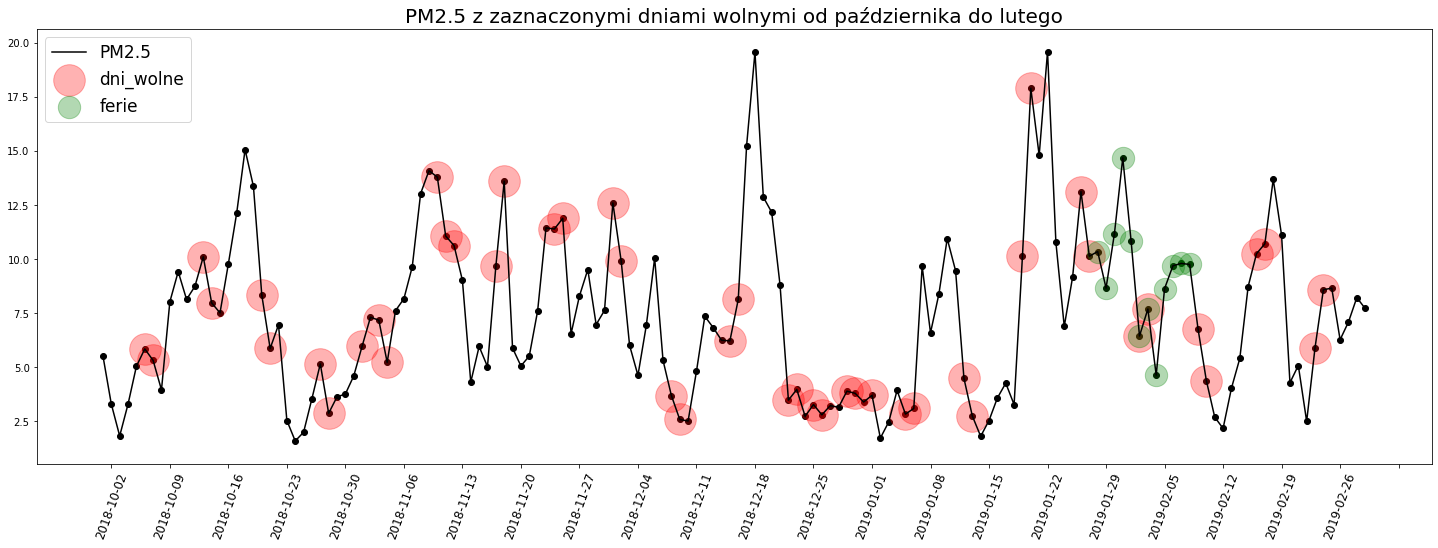

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(super_data_half['data'], super_data_half['avg_PM2.5'] ,color ='black', label = 'PM2.5' )
plt.scatter(super_data_half['data'], super_data_half['avg_PM2.5'] ,color ='black' )
plt.scatter(super_data_wolne['data'], super_data_wolne['avg_PM2.5'] ,color ='red', alpha=0.3, s =1000 , label = 'dni_wolne' )
plt.scatter(super_data_ferie['data'], super_data_ferie['avg_PM2.5'] ,color ='green', alpha=0.3, s =500 , label = 'ferie' )
plt.xticks(fontsize=12,rotation=70)
plt.xticks(np.arange(1, 160, 7))
plt.legend(loc=2, prop={'size': 17})
plt.title('PM2.5 z zaznaczonymi dniami wolnymi od października do lutego', fontsize=20)
plt.show()

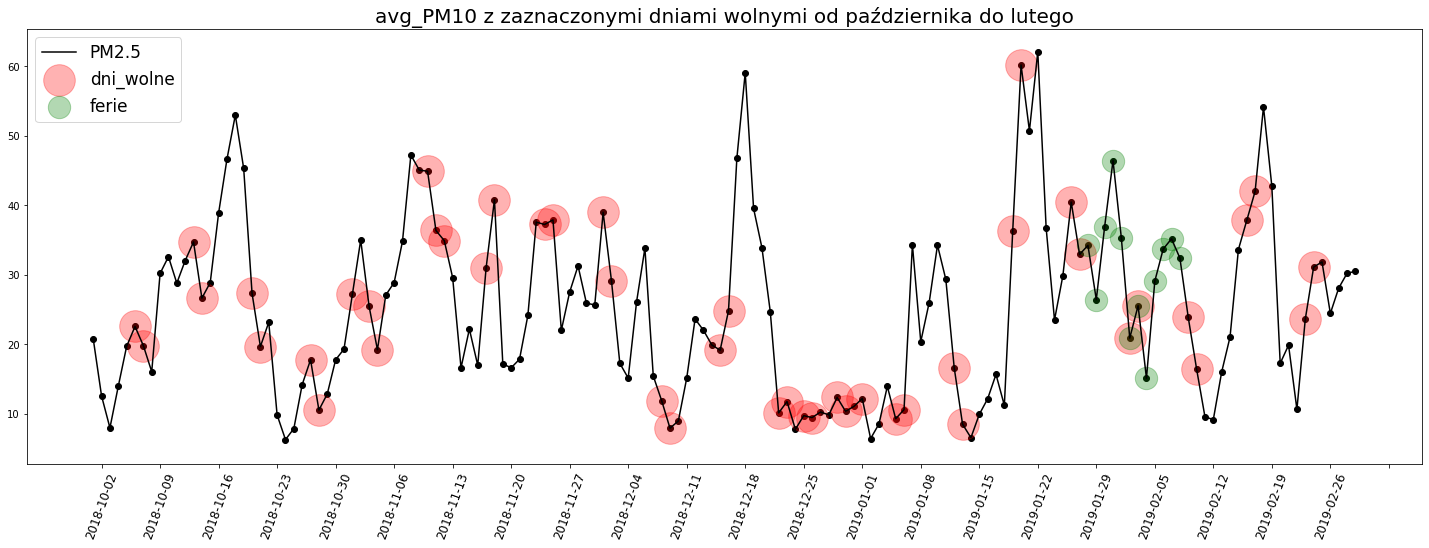

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(super_data_half['data'], super_data_half['avg_PM10'] ,color ='black', label = 'PM2.5' )
plt.scatter(super_data_half['data'], super_data_half['avg_PM10'] ,color ='black' )
plt.scatter(super_data_wolne['data'], super_data_wolne['avg_PM10'] ,color ='red', alpha=0.3, s =1000 , label = 'dni_wolne' )
plt.scatter(super_data_ferie['data'], super_data_ferie['avg_PM10'] ,color ='green', alpha=0.3, s =500 , label = 'ferie' )
plt.xticks(fontsize=12,rotation=70)
plt.xticks(np.arange(1, 160, 7))
plt.legend(loc=2, prop={'size': 17})
plt.title('avg_PM10 z zaznaczonymi dniami wolnymi od października do lutego', fontsize=20)
plt.show()

In [ ]:
buff = ['avg_sred_wilg', 'avg_sred_wiatru', 'avg_max_temp','avg_opady','avg_wilgotnosc','avg_pred_wiatru','avg_zachmurzenie','avg_widzialnosc','czy_roboczy']
buff[:-1]

['avg_sred_wilg',
 'avg_sred_wiatru',
 'avg_max_temp',
 'avg_opady',
 'avg_wilgotnosc',
 'avg_pred_wiatru',
 'avg_zachmurzenie',
 'avg_widzialnosc']

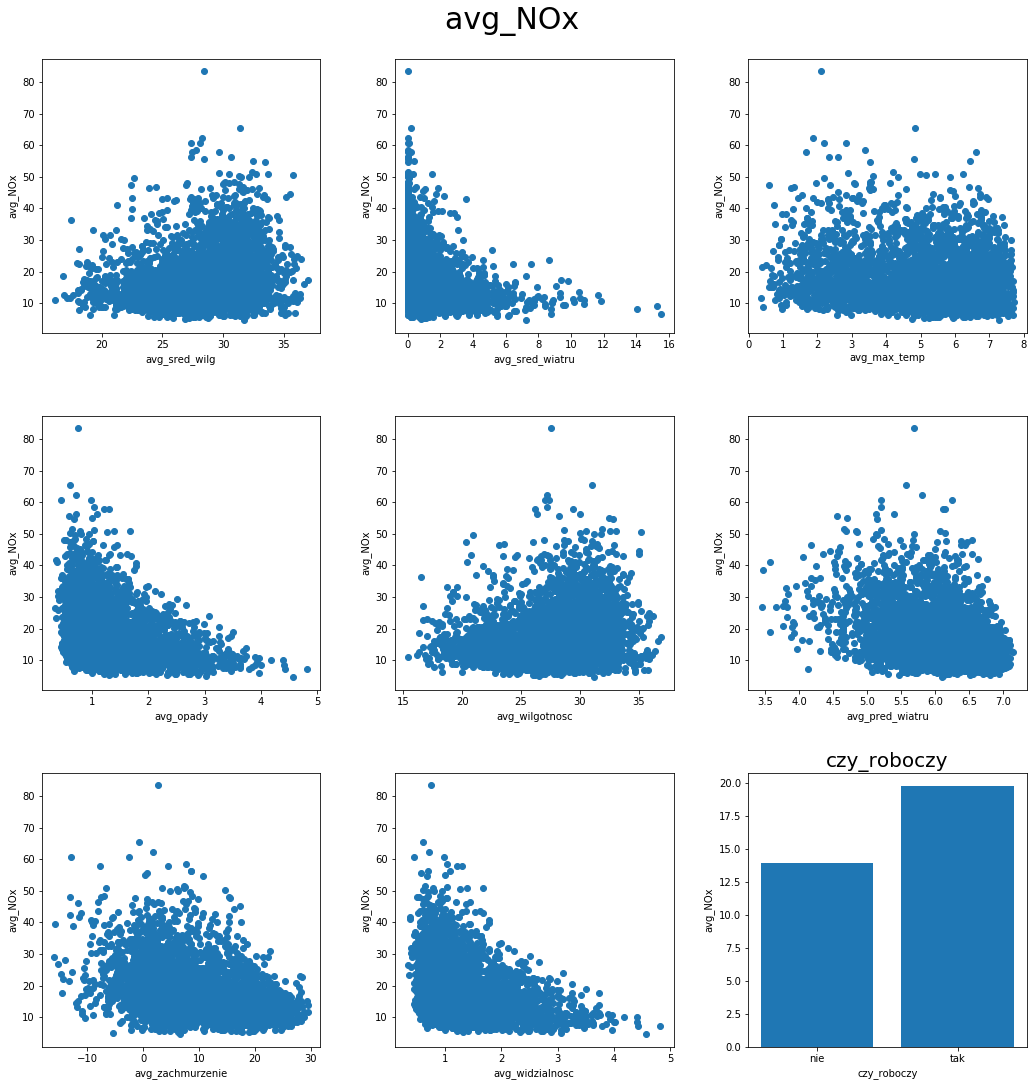

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('avg_NOx \n', fontsize=30,y=1.02)
i = 0
j = 0
for yvar in buff[:-1]:

    axes[i,j].scatter(super_data[yvar],super_data['avg_NOx'])
#     axes[i,j].set_title(yvar, fontsize=20)
    
    for w ,ax in enumerate(axes.flat):
        ax.set(xlabel=buff[w],ylabel='avg_NOx')
        
    i += 1
    if i==3:
        j += 1
        i = 0
        
something =super_data.groupby(['czy_roboczy'])['avg_NOx'].mean().to_frame(name = 'avg_NOx').reset_index()
something['czy_roboczy'] = ['nie','tak']

axes[2,2].bar(something['czy_roboczy'],something['avg_NOx']) 
axes[2,2].set_title('czy_roboczy', fontsize=20)
fig.tight_layout(pad=3.0)

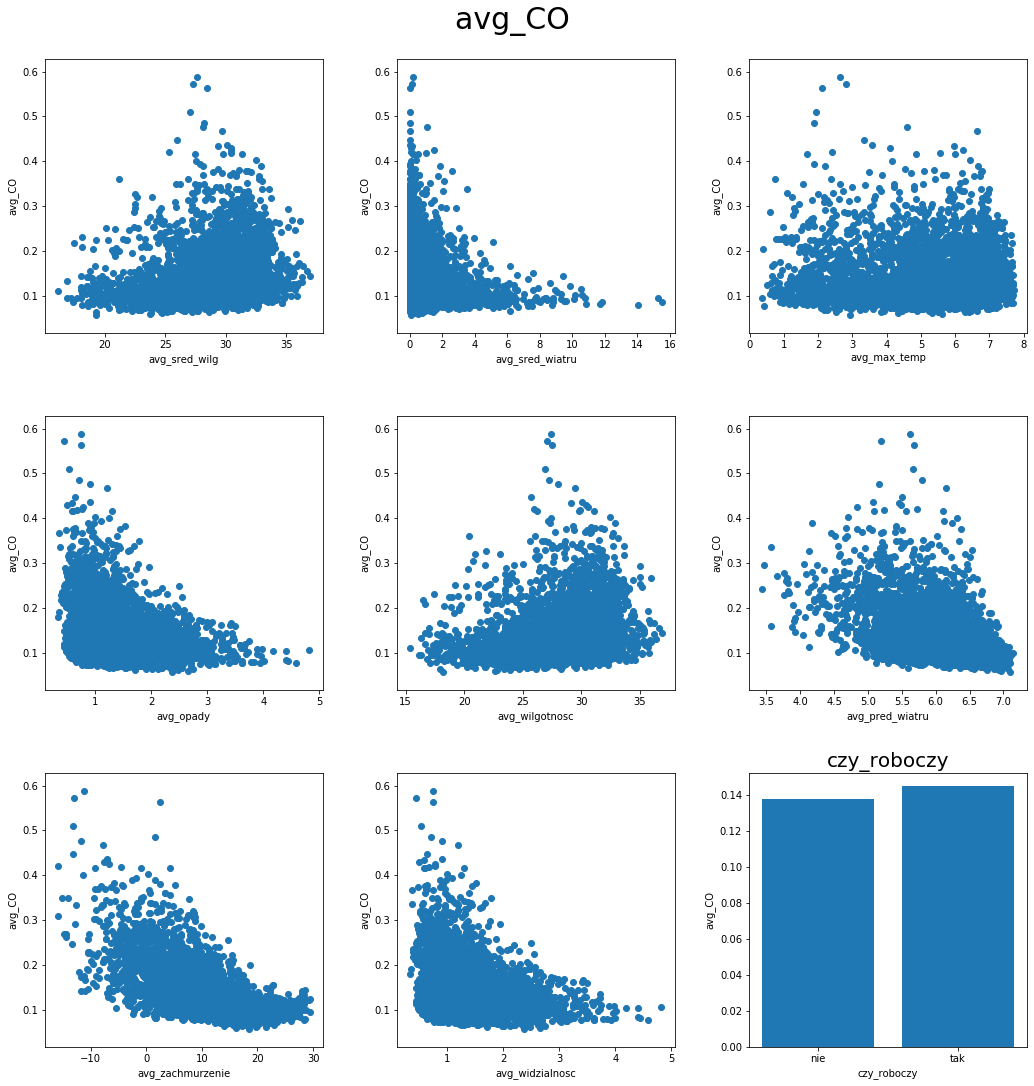

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('avg_CO \n', fontsize=30,y=1.02)
i = 0
j = 0
for yvar in buff[:-1]:

    axes[i,j].scatter(super_data[yvar],super_data['avg_CO'])
#     axes[i,j].set_title(yvar, fontsize=20)
    
    for w ,ax in enumerate(axes.flat):
        ax.set(xlabel=buff[w],ylabel='avg_CO')
        
    i += 1
    if i==3:
        j += 1
        i = 0
        
something =super_data.groupby(['czy_roboczy'])['avg_CO'].mean().to_frame(name = 'avg_CO').reset_index()
something['czy_roboczy'] = ['nie','tak']

axes[2,2].bar(something['czy_roboczy'],something['avg_CO']) 
axes[2,2].set_title('czy_roboczy', fontsize=20)
fig.tight_layout(pad=3.0)

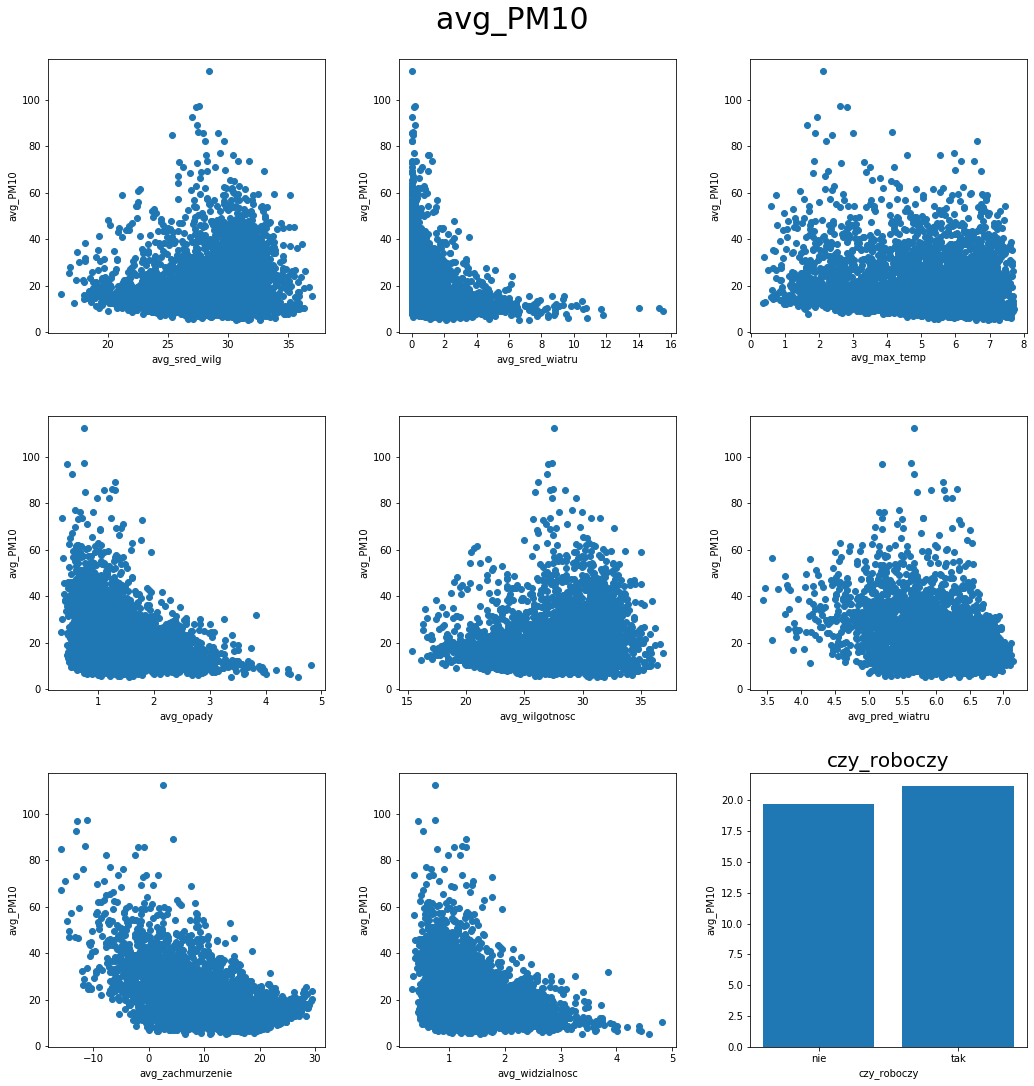

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('avg_PM10 \n', fontsize=30,y=1.02)
i = 0
j = 0
for yvar in buff[:-1]:

    axes[i,j].scatter(super_data[yvar],super_data['avg_PM10'])
#     axes[i,j].set_title(yvar, fontsize=20)
    
    for w ,ax in enumerate(axes.flat):
        ax.set(xlabel=buff[w],ylabel='avg_PM10')
        
    i += 1
    if i==3:
        j += 1
        i = 0
        
something =super_data.groupby(['czy_roboczy'])['avg_PM10'].mean().to_frame(name = 'avg_PM10').reset_index()
something['czy_roboczy'] = ['nie','tak']

axes[2,2].bar(something['czy_roboczy'],something['avg_PM10']) 
axes[2,2].set_title('czy_roboczy', fontsize=20)
fig.tight_layout(pad=3.0)

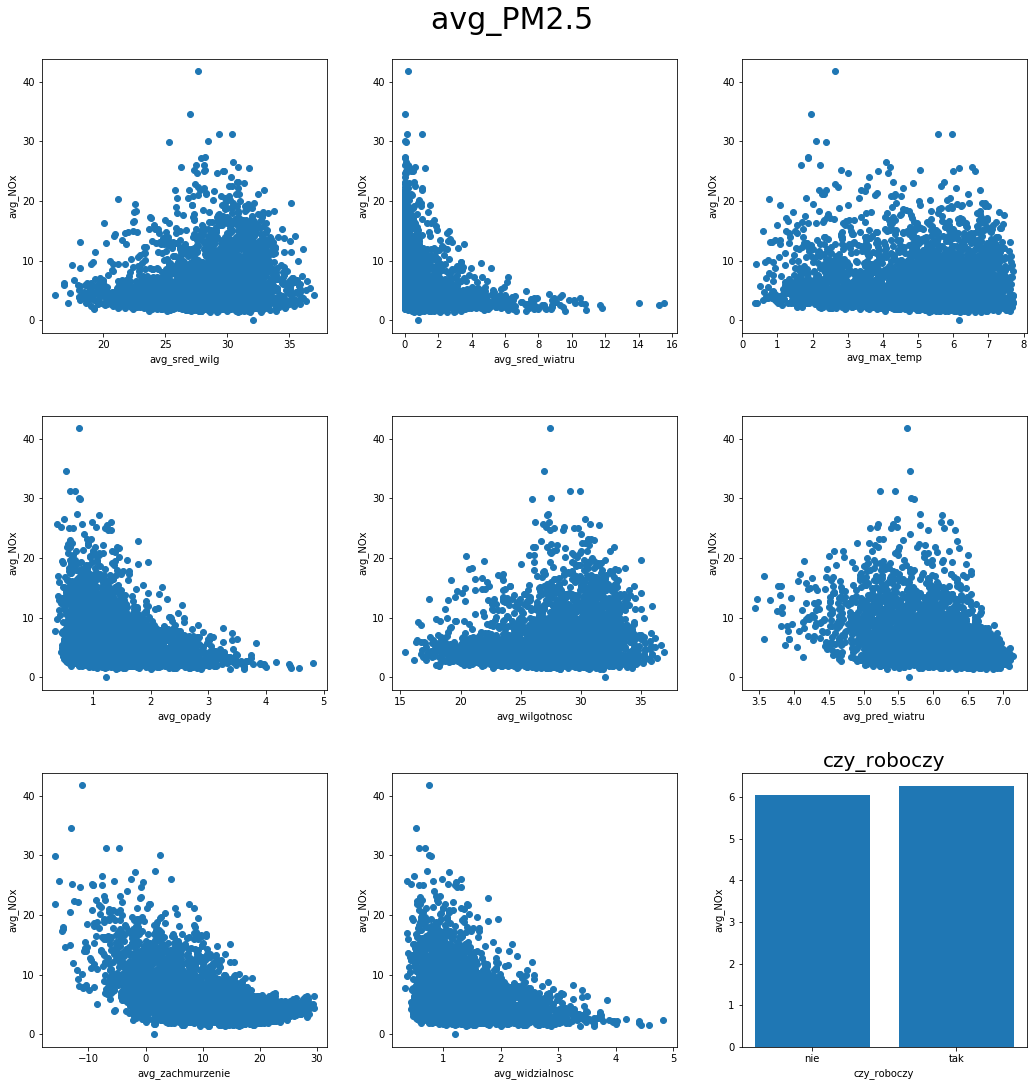

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('avg_PM2.5 \n', fontsize=30,y=1.02)
i = 0
j = 0
for yvar in buff[:-1]:

    axes[i,j].scatter(super_data[yvar],super_data['avg_PM2.5'])
#     axes[i,j].set_title(yvar, fontsize=20)
    
    for w ,ax in enumerate(axes.flat):
        ax.set(xlabel=buff[w],ylabel='avg_NOx')
        
    i += 1
    if i==3:
        j += 1
        i = 0
        
something =super_data.groupby(['czy_roboczy'])['avg_PM2.5'].mean().to_frame(name = 'avg_PM2.5').reset_index()
something['czy_roboczy'] = ['nie','tak']

axes[2,2].bar(something['czy_roboczy'],something['avg_PM2.5']) 
axes[2,2].set_title('czy_roboczy', fontsize=20)
fig.tight_layout(pad=3.0)

In [ ]:
super_data

,data,avg_PM10,avg_NOx,avg_CO,avg_PM2.5,avg_sred_wilg,avg_sred_wiatru,avg_max_temp,avg_opady,avg_wilgotnosc,avg_pred_wiatru,avg_zachmurzenie,avg_widzialnosc,czy_roboczy,swieta,ferie,Rok,Miesiac,dzien_tyg
0,2010-01-01,22.796103,15.087031,0.259478,5.256655,32.729936,0.847134,-0.479936,0.599682,32.660297,0.847134,6.876858,4.475584,0,1.0,0.0,2010,1,5
1,2010-01-02,16.905945,11.194488,0.192366,3.263996,32.339490,0.996178,-1.983121,1.329936,32.227176,0.993631,6.919321,4.859873,0,0.0,0.0,2010,1,6
2,2010-01-03,19.881110,16.507427,0.248623,4.098678,31.136306,0.810191,-5.387261,0.515605,30.915074,0.808917,5.989384,5.091295,0,0.0,0.0,2010,1,7
3,2010-01-04,34.179291,30.762415,0.343528,8.874525,30.170701,0.835032,-7.214013,0.059873,29.989384,0.836518,4.794055,5.554140,1,0.0,0.0,2010,1,1
4,2010-01-05,38.262170,35.742975,0.374067,9.664538,30.580892,0.882803,-6.159873,0.074841,30.515924,0.883227,4.711253,5.505308,1,0.0,0.0,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,8.211599,10.022404,0.099534,2.375644,35.366154,2.030769,1.848462,1.944615,35.143590,2.025641,7.117949,5.835897,1,0.0,0.0,2019,12,5
3648,2019-12-28,6.788903,7.024040,0.092455,2.013984,33.180000,2.718462,0.117692,0.696154,32.974359,2.717949,7.410256,6.028205,0,0.0,0.0,2019,12,6
3649,2019-12-29,12.091678,8.862514,0.104651,3.346889,32.892308,1.403077,-1.586154,0.063846,32.682051,1.405128,6.784615,6.382051,0,0.0,0.0,2019,12,7
3650,2019-12-30,19.259876,16.127056,0.134168,5.829050,28.072308,1.946154,1.427692,0.045385,26.994872,1.943590,6.605128,6.582051,1,0.0,0.0,2019,12,1


In [ ]:
corr_PM2_5 = super_data[super_data.columns[:]].corr()['avg_PM2.5'][:].to_frame(name = 'PM2.5').reset_index()
corr_PM10 = super_data[super_data.columns[:]].corr()['avg_PM10'][:].to_frame(name = 'PM10').reset_index()
corr_CO =  super_data[super_data.columns[:]].corr()['avg_CO'][:].to_frame(name = 'CO').reset_index()
corr_NOx = super_data[super_data.columns[:]].corr()['avg_NOx'][:].to_frame(name = 'NOx').reset_index()
corr_PM10

,index,PM10
0,avg_PM10,1.000000
1,avg_NOx,0.814044
2,avg_CO,0.915376
3,avg_PM2.5,0.973722
4,avg_sred_wilg,0.150586
5,avg_sred_wiatru,-0.255616
6,avg_max_temp,-0.565839
7,avg_opady,-0.315941
8,avg_wilgotnosc,0.167024
9,avg_pred_wiatru,-0.255416


In [ ]:
super_corr =  pd.merge(left=corr_PM10, right=corr_PM2_5, left_on='index',right_on='index')
super_corr =  pd.merge(left=super_corr, right=corr_CO, left_on='index',right_on='index')
super_corr =  pd.merge(left=super_corr, right=corr_NOx, left_on='index',right_on='index')
super_corr[['PM2.5','CO','NOx','PM10']] = super_corr[['PM2.5','CO','NOx','PM10']].abs()
super_corr


,index,PM10,PM2.5,CO,NOx
0,avg_PM10,1.000000,0.973722,0.915376,0.814044
1,avg_NOx,0.814044,0.788267,0.844325,1.000000
2,avg_CO,0.915376,0.925139,1.000000,0.844325
3,avg_PM2.5,0.973722,1.000000,0.925139,0.788267
4,avg_sred_wilg,0.150586,0.196013,0.297661,0.224764
5,avg_sred_wiatru,0.255616,0.262834,0.234173,0.323871
6,avg_max_temp,0.565839,0.609458,0.666748,0.418894
7,avg_opady,0.315941,0.286702,0.247335,0.279931
8,avg_wilgotnosc,0.167024,0.214978,0.316137,0.223602
9,avg_pred_wiatru,0.255416,0.262625,0.233952,0.323529


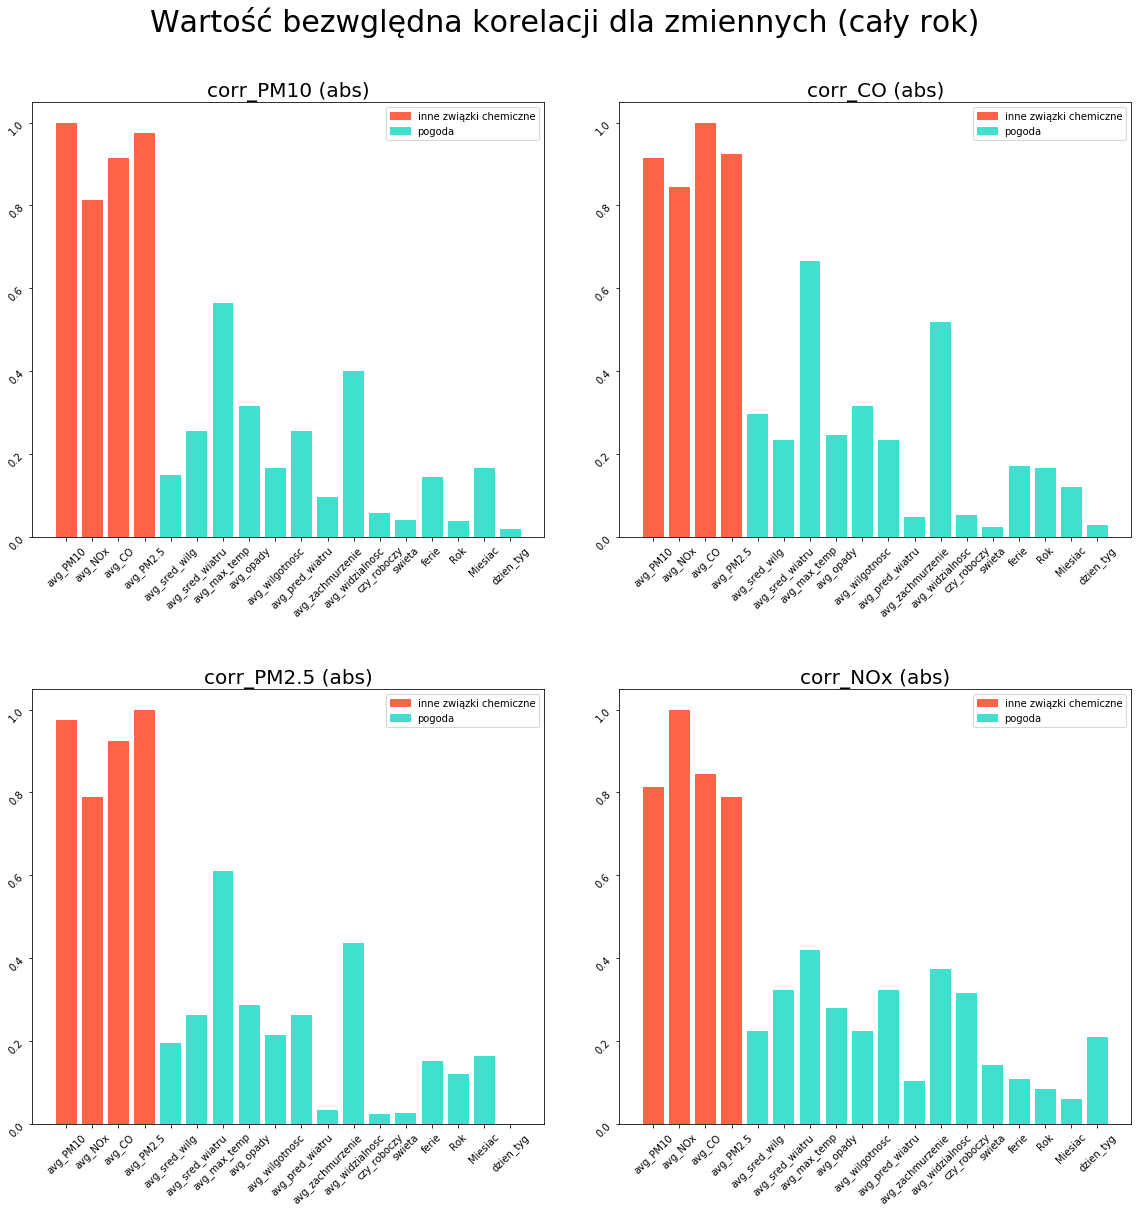

In [ ]:

col = ['turquoise']* len(super_corr['index'])
col[:3] = ['tomato'] *4
red_patch = mpatches.Patch(color='tomato', label='inne związki chemiczne')
blue_patch = mpatches.Patch(color='turquoise', label='pogoda')

fig, axes = plt.subplots(2,2,figsize=(17,17))

fig.suptitle('Wartość bezwględna korelacji dla zmiennych (cały rok) \n', fontsize=30,y=1.02)

axes[0,0].bar(super_corr['index'],super_corr['PM10'], color = col)
axes[0,0].set_title('corr_PM10 (abs)', fontsize=20)
axes[0,0].legend(handles=[red_patch, blue_patch])


axes[1,0].bar(super_corr['index'],super_corr['PM2.5'], color = col)
axes[1,0].set_title('corr_PM2.5 (abs)', fontsize=20)
axes[1,0].legend(handles=[red_patch, blue_patch])

axes[0,1].bar(super_corr['index'],super_corr['CO'], color = col)
axes[0,1].set_title('corr_CO (abs)', fontsize=20)
axes[0,1].legend(handles=[red_patch, blue_patch])


axes[1,1].bar(super_corr['index'],super_corr['NOx'], color = col)
axes[1,1].set_title('corr_NOx (abs)', fontsize=20)
axes[1,1].legend(handles=[red_patch, blue_patch])

for ax in fig.axes:
    ax.tick_params(labelrotation=45)


fig.tight_layout(pad=5.0)

In [ ]:

super_data_half = super_data[super_data.data.isin(list_of_days)]

del super_data_half['Rok']



corr_PM2_5_half = super_data_half[super_data_half.columns[:]].corr()['avg_PM2.5'][:].to_frame(name = 'PM2.5').reset_index()
corr_PM10_half = super_data_half[super_data_half.columns[:]].corr()['avg_PM10'][:].to_frame(name = 'PM10').reset_index()
corr_CO_half =  super_data_half[super_data_half.columns[:]].corr()['avg_CO'][:].to_frame(name = 'CO').reset_index()
corr_NOx_half = super_data_half[super_data_half.columns[:]].corr()['avg_NOx'][:].to_frame(name = 'NOx').reset_index()
# corr_PM10
super_data_half

,data,avg_PM10,avg_NOx,avg_CO,avg_PM2.5,avg_sred_wilg,avg_sred_wiatru,avg_max_temp,avg_opady,avg_wilgotnosc,avg_pred_wiatru,avg_zachmurzenie,avg_widzialnosc,czy_roboczy,swieta,ferie,Miesiac,dzien_tyg
3195,2018-10-01,20.823307,26.761888,0.146347,5.518630,29.656338,1.142254,11.824648,0.393662,28.384977,1.145540,3.964789,6.521127,1,0.0,0.0,10,1
3196,2018-10-02,12.583022,12.243887,0.091032,3.292097,32.583099,1.861972,9.462676,2.264085,31.755869,1.863850,6.366197,6.039906,1,0.0,0.0,10,2
3197,2018-10-03,8.011418,8.794038,0.077382,1.821975,31.116901,3.621127,9.926056,1.278169,30.600939,3.619718,6.183099,6.441315,1,0.0,0.0,10,3
3198,2018-10-04,14.003494,15.817524,0.102516,3.295179,31.678873,2.011268,9.722535,0.043662,30.661972,2.014085,4.474178,6.765258,1,0.0,0.0,10,4
3199,2018-10-05,19.743364,24.699354,0.135464,5.042784,30.160563,1.397183,12.492958,0.000704,29.023474,1.399061,2.525822,6.549296,1,0.0,0.0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,2019-02-25,31.874805,22.339269,0.143382,8.660137,25.776471,2.044118,5.738971,0.001471,26.794118,2.044118,3.867647,6.473039,1,0.0,0.0,2,1
3343,2019-02-26,24.469201,16.403308,0.108589,6.274874,27.075000,3.019118,6.730147,0.007353,27.450980,3.014706,5.450980,6.507353,1,0.0,0.0,2,2
3344,2019-02-27,28.116769,22.973342,0.135224,7.093632,28.389706,2.222059,6.442647,0.000000,28.333333,2.220588,3.536765,6.340686,1,0.0,0.0,2,3
3345,2019-02-28,30.237043,17.702189,0.111436,8.223131,22.892647,3.255882,8.919118,0.000000,23.200980,3.254902,2.526961,6.740196,1,0.0,0.0,2,4


In [ ]:
super_corr_half =  pd.merge(left=corr_PM10_half, right=corr_PM2_5_half, left_on='index',right_on='index')
super_corr_half =  pd.merge(left=super_corr_half, right=corr_CO_half, left_on='index',right_on='index')
super_corr_half =  pd.merge(left=super_corr_half, right=corr_NOx_half, left_on='index',right_on='index')
super_corr_half[['PM2.5','CO','NOx','PM10']] = super_corr_half[['PM2.5','CO','NOx','PM10']].abs()
super_corr_half

,index,PM10,PM2.5,CO,NOx
0,avg_PM10,1.000000,0.978780,0.869491,0.815150
1,avg_NOx,0.815150,0.767899,0.830544,1.000000
2,avg_CO,0.869491,0.899875,1.000000,0.830544
3,avg_PM2.5,0.978780,1.000000,0.899875,0.767899
4,avg_sred_wilg,0.188678,0.076634,0.157308,0.079367
5,avg_sred_wiatru,0.679783,0.672701,0.688176,0.685468
6,avg_max_temp,0.020923,0.129051,0.058533,0.219989
7,avg_opady,0.485225,0.445375,0.383673,0.423903
8,avg_wilgotnosc,0.205937,0.082192,0.109063,0.157344
9,avg_pred_wiatru,0.680694,0.673136,0.687966,0.686184


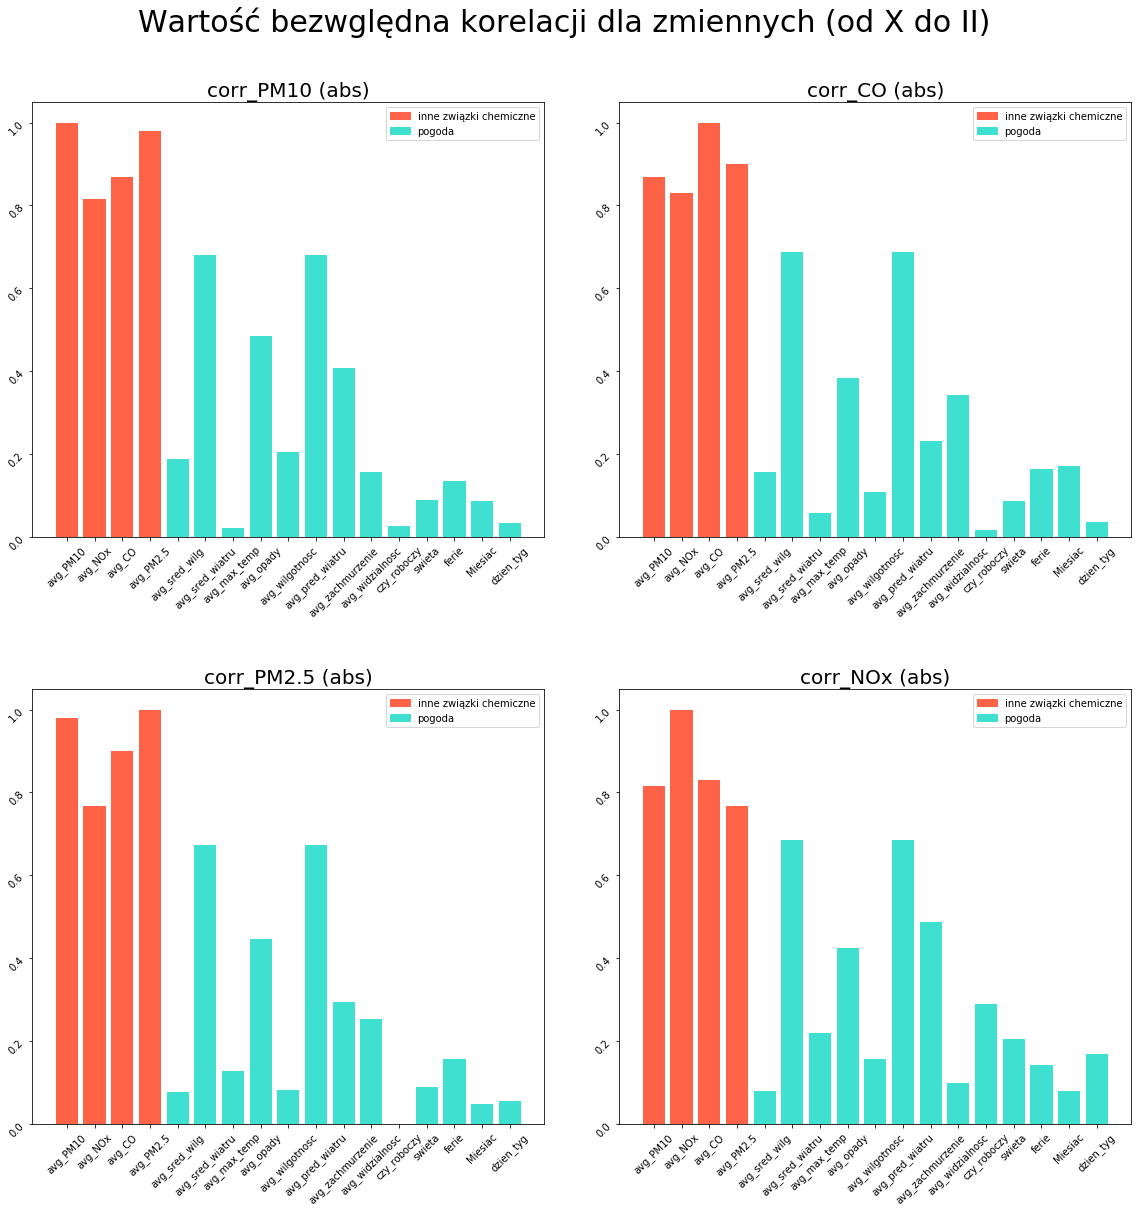

In [ ]:

col = ['turquoise']* len(super_corr_half['index'])
col[:3] = ['tomato'] *4
red_patch = mpatches.Patch(color='tomato', label='inne związki chemiczne')
blue_patch = mpatches.Patch(color='turquoise', label='pogoda')

fig, axes = plt.subplots(2,2,figsize=(17,17))

fig.suptitle('Wartość bezwględna korelacji dla zmiennych (od X do II) \n', fontsize=30,y=1.02)

axes[0,0].bar(super_corr_half['index'],super_corr_half['PM10'], color = col)
axes[0,0].set_title('corr_PM10 (abs)', fontsize=20)
axes[0,0].legend(handles=[red_patch, blue_patch])


axes[1,0].bar(super_corr_half['index'],super_corr_half['PM2.5'], color = col)
axes[1,0].set_title('corr_PM2.5 (abs)', fontsize=20)
axes[1,0].legend(handles=[red_patch, blue_patch])

axes[0,1].bar(super_corr_half['index'],super_corr_half['CO'], color = col)
axes[0,1].set_title('corr_CO (abs)', fontsize=20)
axes[0,1].legend(handles=[red_patch, blue_patch])


axes[1,1].bar(super_corr_half['index'],super_corr_half['NOx'], color = col)
axes[1,1].set_title('corr_NOx (abs)', fontsize=20)
axes[1,1].legend(handles=[red_patch, blue_patch])

for ax in fig.axes:
    ax.tick_params(labelrotation=45)


fig.tight_layout(pad=5.0)